In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('TARCH2018_2023.csv')

In [35]:
len(df)

20981

In [36]:
df.head()

,Item Loan Id,Loan Date,In House Loan Indicator,Barcode,Permanent Call Number,Circulation Library Code,Owning Library Code,Title (Complete),Author,Subjects,MMS Id,Subjects (Names)
0,2252958767220001701,1/2/2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Cities and towns; Metropolitan areas; Urbaniza...,9913933350001701,NaN
1,2252959196040001701,1/2/2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Monuments--Conservation and restoration--Unite...,9930689970001701,NaN
2,2252965815260001701,1/3/2018,N,31951P012191854,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.; ...,9929887730001701,NaN
3,2252965816190001701,1/3/2018,N,31951P012191862,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.; ...,9929887730001701,NaN
4,2252965817370001701,1/3/2018,N,31951P012055993,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.; ...,9929887730001701,NaN


In [37]:
# Get a list of columns
columns =df.columns.values.tolist()
columns

['Item Loan Id',
 'Loan Date',
 'In House Loan Indicator',
 'Barcode',
 'Permanent Call Number',
 'Circulation Library Code',
 'Owning Library Code',
 'Title (Complete)',
 'Author',
 'Subjects',
 'MMS Id',
 'Subjects (Names)']

In [38]:
# Reorder columns and select the ones we want
df = df[[
'Item Loan Id',
'MMS Id',
'Title (Complete)',
'Loan Date',
'Subjects',
'Permanent Call Number',
'Author',
'Subjects (Names)']]

In [39]:
# rename columns
df = df.rename(columns={'Title (Complete)' : 'Title',
                   'Permanent Call Number' : 'Call Number',
               'Loan Date' : 'Date'})

#convert to string and change year to whole year
df['Date'] = df['Date'].astype(str).str[-4:]
df.head(5)

,Item Loan Id,MMS Id,Title,Date,Subjects,Call Number,Author,Subjects (Names)
0,2252958767220001701,9913933350001701,Postmetropolis : critical studies of cities an...,2018,Cities and towns; Metropolitan areas; Urbaniza...,HT119 .S65 2000,"Soja, Edward W.",NaN
1,2252959196040001701,9930689970001701,Presence of the past ; a history of the preser...,2018,Monuments--Conservation and restoration--Unite...,E159 .H77,"Hosmer, Charles Bridgham, 1932-",NaN
2,2252965815260001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN
3,2252965816190001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN
4,2252965817370001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN


In [40]:
# Create a DataFrame for slicing the first subject
first_subject_df = df.copy()
first_subject_df

,Item Loan Id,MMS Id,Title,Date,Subjects,Call Number,Author,Subjects (Names)
0,2252958767220001701,9913933350001701,Postmetropolis : critical studies of cities an...,2018,Cities and towns; Metropolitan areas; Urbaniza...,HT119 .S65 2000,"Soja, Edward W.",NaN
1,2252959196040001701,9930689970001701,Presence of the past ; a history of the preser...,2018,Monuments--Conservation and restoration--Unite...,E159 .H77,"Hosmer, Charles Bridgham, 1932-",NaN
2,2252965815260001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN
3,2252965816190001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN
4,2252965817370001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...
20976,2292994879700001701,9915376720001701,Atlas of vernacular architecture of the world ...,2023,Vernacular architecture--Maps.,Quarto NA208 .V45 2007,"Vellinga, Marcel",NaN
20977,2292994880190001701,9976759912401701,Southern exposure : the overlooked architectur...,2023,Architecture--Illinois--Chicago--History.; Arc...,NA735.C4 B49 2019,"Bey, Lee, 1965- author.",NaN
20978,2292994880760001701,9962190700001701,The art of building cities : city building acc...,2023,"Urban beautification; Art, Municipal",Quarto NA9030 .S6 1979,"Sitte, Camillo, 1843-1903",NaN
20979,2292994881510001701,9930119410001701,"Marc Newson / [text, Alice Rawsthorn ; design ...",2023,"Newson, Marc,--1963-; Industrial designers--Au...",TS140.N49 .R29x 1999,"Rawsthorn, Alice","Newson, Marc, 1963-"


In [41]:
# Create a DataFrame for slicing the first three subjects
three_subject_df = df
three_subject_df

,Item Loan Id,MMS Id,Title,Date,Subjects,Call Number,Author,Subjects (Names)
0,2252958767220001701,9913933350001701,Postmetropolis : critical studies of cities an...,2018,Cities and towns; Metropolitan areas; Urbaniza...,HT119 .S65 2000,"Soja, Edward W.",NaN
1,2252959196040001701,9930689970001701,Presence of the past ; a history of the preser...,2018,Monuments--Conservation and restoration--Unite...,E159 .H77,"Hosmer, Charles Bridgham, 1932-",NaN
2,2252965815260001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN
3,2252965816190001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN
4,2252965817370001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.; ...,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...
20976,2292994879700001701,9915376720001701,Atlas of vernacular architecture of the world ...,2023,Vernacular architecture--Maps.,Quarto NA208 .V45 2007,"Vellinga, Marcel",NaN
20977,2292994880190001701,9976759912401701,Southern exposure : the overlooked architectur...,2023,Architecture--Illinois--Chicago--History.; Arc...,NA735.C4 B49 2019,"Bey, Lee, 1965- author.",NaN
20978,2292994880760001701,9962190700001701,The art of building cities : city building acc...,2023,"Urban beautification; Art, Municipal",Quarto NA9030 .S6 1979,"Sitte, Camillo, 1843-1903",NaN
20979,2292994881510001701,9930119410001701,"Marc Newson / [text, Alice Rawsthorn ; design ...",2023,"Newson, Marc,--1963-; Industrial designers--Au...",TS140.N49 .R29x 1999,"Rawsthorn, Alice","Newson, Marc, 1963-"


In [42]:
# Slice the first subject
first_subject_df['Subjects'] = first_subject_df['Subjects'].str.split(';').str[0]
first_subject_df

,Item Loan Id,MMS Id,Title,Date,Subjects,Call Number,Author,Subjects (Names)
0,2252958767220001701,9913933350001701,Postmetropolis : critical studies of cities an...,2018,Cities and towns,HT119 .S65 2000,"Soja, Edward W.",NaN
1,2252959196040001701,9930689970001701,Presence of the past ; a history of the preser...,2018,Monuments--Conservation and restoration--Unite...,E159 .H77,"Hosmer, Charles Bridgham, 1932-",NaN
2,2252965815260001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.,Unknown,NaN,NaN
3,2252965816190001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.,Unknown,NaN,NaN
4,2252965817370001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...
20976,2292994879700001701,9915376720001701,Atlas of vernacular architecture of the world ...,2023,Vernacular architecture--Maps.,Quarto NA208 .V45 2007,"Vellinga, Marcel",NaN
20977,2292994880190001701,9976759912401701,Southern exposure : the overlooked architectur...,2023,Architecture--Illinois--Chicago--History.,NA735.C4 B49 2019,"Bey, Lee, 1965- author.",NaN
20978,2292994880760001701,9962190700001701,The art of building cities : city building acc...,2023,Urban beautification,Quarto NA9030 .S6 1979,"Sitte, Camillo, 1843-1903",NaN
20979,2292994881510001701,9930119410001701,"Marc Newson / [text, Alice Rawsthorn ; design ...",2023,"Newson, Marc,--1963-",TS140.N49 .R29x 1999,"Rawsthorn, Alice","Newson, Marc, 1963-"


In [43]:
#Get the first three Subject subjects
three_subject_df['Subjects'] = three_subject_df['Subjects'].str.split(';').str[0:3]
three_subject_df = three_subject_df.explode('Subjects')
three_subject_df.head(5)


,Item Loan Id,MMS Id,Title,Date,Subjects,Call Number,Author,Subjects (Names)
0,2252958767220001701,9913933350001701,Postmetropolis : critical studies of cities an...,2018,Cities and towns,HT119 .S65 2000,"Soja, Edward W.",NaN
0,2252958767220001701,9913933350001701,Postmetropolis : critical studies of cities an...,2018,Metropolitan areas,HT119 .S65 2000,"Soja, Edward W.",NaN
0,2252958767220001701,9913933350001701,Postmetropolis : critical studies of cities an...,2018,Urbanization,HT119 .S65 2000,"Soja, Edward W.",NaN
1,2252959196040001701,9930689970001701,Presence of the past ; a history of the preser...,2018,Monuments--Conservation and restoration--Unite...,E159 .H77,"Hosmer, Charles Bridgham, 1932-",NaN
1,2252959196040001701,9930689970001701,Presence of the past ; a history of the preser...,2018,Historic buildings--United States,E159 .H77,"Hosmer, Charles Bridgham, 1932-",NaN


In [44]:
# check to see if slicing was done correctly
print('initial df: ', df['Subjects'][0])
print('first_subject_df: ', first_subject_df['Subjects'][0])
print('three_subject_df:', three_subject_df['Subjects'][0])

initial df:  ['Cities and towns', ' Metropolitan areas', ' Urbanization']
first_subject_df:  Cities and towns
three_subject_df: 0       Cities and towns
0     Metropolitan areas
0           Urbanization
Name: Subjects, dtype: object


In [45]:
first_subject_df.to_csv('FirstSubjectAlmaData.csv', index=False)  
three_subject_df.to_csv('ThreeSubjectsAlmaData.csv', index=False)  



In [46]:
first_subject_df


,Item Loan Id,MMS Id,Title,Date,Subjects,Call Number,Author,Subjects (Names)
0,2252958767220001701,9913933350001701,Postmetropolis : critical studies of cities an...,2018,Cities and towns,HT119 .S65 2000,"Soja, Edward W.",NaN
1,2252959196040001701,9930689970001701,Presence of the past ; a history of the preser...,2018,Monuments--Conservation and restoration--Unite...,E159 .H77,"Hosmer, Charles Bridgham, 1932-",NaN
2,2252965815260001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.,Unknown,NaN,NaN
3,2252965816190001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.,Unknown,NaN,NaN
4,2252965817370001701,9929887730001701,Topos : European landscape magazine.,2018,Landscape architecture--Europe--Periodicals.,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...
20976,2292994879700001701,9915376720001701,Atlas of vernacular architecture of the world ...,2023,Vernacular architecture--Maps.,Quarto NA208 .V45 2007,"Vellinga, Marcel",NaN
20977,2292994880190001701,9976759912401701,Southern exposure : the overlooked architectur...,2023,Architecture--Illinois--Chicago--History.,NA735.C4 B49 2019,"Bey, Lee, 1965- author.",NaN
20978,2292994880760001701,9962190700001701,The art of building cities : city building acc...,2023,Urban beautification,Quarto NA9030 .S6 1979,"Sitte, Camillo, 1843-1903",NaN
20979,2292994881510001701,9930119410001701,"Marc Newson / [text, Alice Rawsthorn ; design ...",2023,"Newson, Marc,--1963-",TS140.N49 .R29x 1999,"Rawsthorn, Alice","Newson, Marc, 1963-"


In [47]:
# split the data year by year then write it out
def Mask(year, df):
    mask_year = df[(df.Date == year)]
    mask_year.to_csv('FirstThree' + 'AlmaData' + str(year) +'.csv', index=False )
    # print(mask_year)
    return(mask_year)

for i in range(2018,2024):
    files = Mask(str(i), three_subject_df)
    uniques = (i, len(files['Subjects'].unique()))
    print(uniques)
    
    


(2018, 7204)
(2019, 6793)
(2020, 3354)
(2021, 3376)
(2022, 3881)
(2023, 3848)


In [48]:
firstsubjectyearcounts = first_subject_df['Date'].value_counts().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
allcheckouts = firstsubjectyearcounts['Counts'].sum()
firstsubjectyearcounts['Total Counts %'] = firstsubjectyearcounts['Counts'] / allcheckouts
firstsubjectyearcounts

,Date,Counts,Total Counts %
0,2018,5996,0.285782
1,2019,5575,0.265717
2,2022,2665,0.127020
3,2023,2630,0.125352
4,2021,2103,0.100234
5,2020,2012,0.095896


In [49]:
threesubjectyearcounts = three_subject_df['Date'].value_counts().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
threesubjectyearcounts

,Date,Counts
0,2018,14510
1,2019,13600
2,2022,6588
3,2023,6464
4,2021,5226
5,2020,4981


In [50]:
first_subject_counts = first_subject_df['Subjects'].value_counts()
first_subject_counts.head(25)

Subjects
Architecture--Spain--Periodicals.                          569
Architecture--Periodicals                                  365
Architecture, Modern--20th century                         253
City planning                                              175
Architecture                                               135
Architecture and society                                   124
Architectural design                                       123
Architecture--Philosophy                                   120
Architecture--Environmental aspects                        119
Landscape architecture                                     110
Andō, Tadao,--1941-                                       107
Architecture, Domestic--Designs and plans                  101
Building, Wooden                                            78
Architecture--Human factors                                 77
City planning--United States                                71
Architecture, Domestic--Japan                 

In [51]:
three_subject_counts = three_subject_df['Subjects'].value_counts()
three_subject_counts.head(25)

Subjects
 Architecture--Periodicals                                616
Architecture--Spain--Periodicals.                         569
 Architecture--Espagne--20e siècle--Périodiques.        566
 Architecture, Modern--20th century                       535
Architecture--Periodicals                                 365
 Architecture, Modern--21st century                       352
 Architecture                                             279
Architecture, Modern--20th century                        253
 Building--Periodicals                                    199
 City planning                                            196
 Architecture--Details--Periodicals.                      185
City planning                                             175
 Architectural design                                     174
 Architecture--United States--History--20th century       165
 Architecture--Philosophy                                 146
 Architecture and society                                 142

<Axes: xlabel='Subjects'>

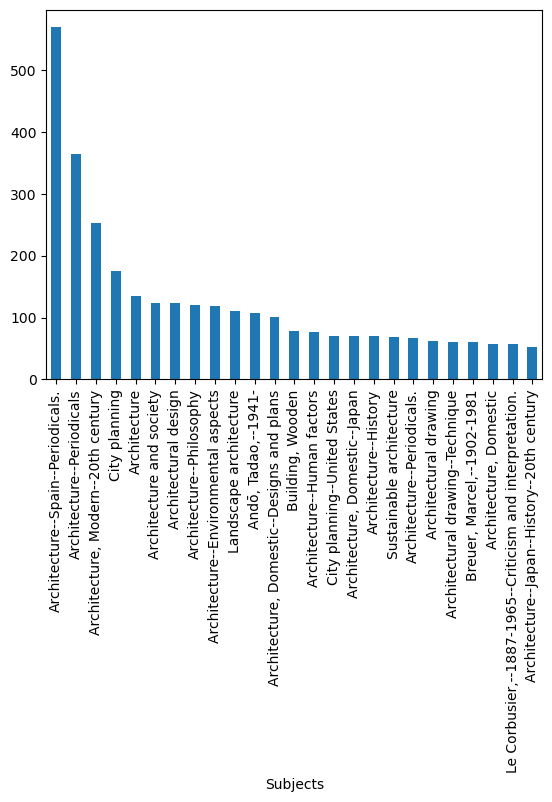

In [52]:
first_subject_counts.head(25).plot.bar()

<Axes: xlabel='Subjects'>

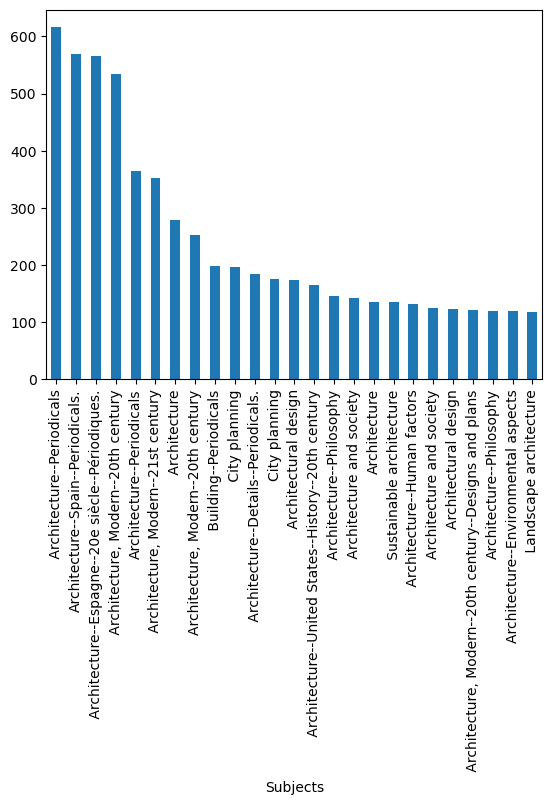

In [53]:
three_subject_counts.head(25).plot.bar()

In [54]:
# Create DataFrames from Series
df1 = pd.DataFrame(three_subject_counts).reset_index()
df2 = pd.DataFrame(first_subject_counts).reset_index()

# Merge SeriDataFrames into one DataFrame
bar_df = pd.merge(df1, df2, how='left', on='Subjects')
bar_df = bar_df.rename(columns={'count_x': 'Three Subjects', 'count_y': 'First Subjects'})

bar_df.head(25)


,Subjects,Three Subjects,First Subjects
0,Architecture--Periodicals,616,NaN
1,Architecture--Spain--Periodicals.,569,569.0
2,Architecture--Espagne--20e siècle--Périodiq...,566,NaN
3,"Architecture, Modern--20th century",535,NaN
4,Architecture--Periodicals,365,365.0
5,"Architecture, Modern--21st century",352,NaN
6,Architecture,279,NaN
7,"Architecture, Modern--20th century",253,253.0
8,Building--Periodicals,199,NaN
9,City planning,196,NaN


<Axes: ylabel='Subjects'>

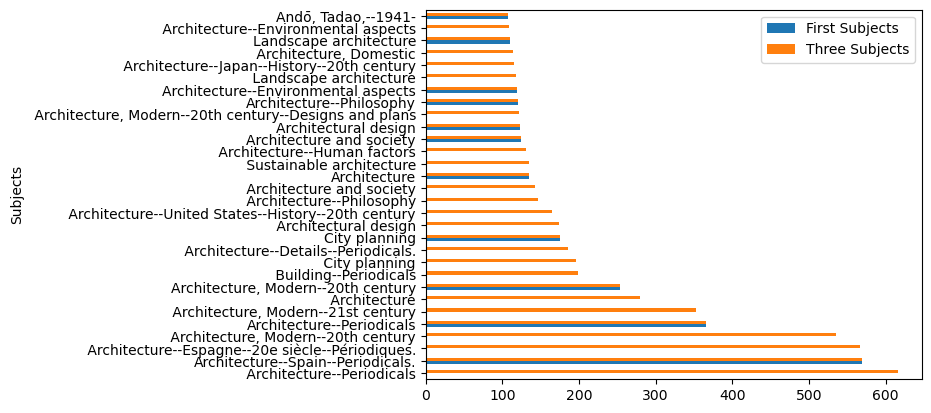

In [55]:
bar_df = bar_df.head(30)
bar_df.plot(x='Subjects', y=['First Subjects', 'Three Subjects'], kind='barh')

In [56]:
first_subject_df.groupby('Subjects').size().sort_values(ascending=[False]).head(25)

Subjects
Architecture--Spain--Periodicals.                          569
Architecture--Periodicals                                  365
Architecture, Modern--20th century                         253
City planning                                              175
Architecture                                               135
Architecture and society                                   124
Architectural design                                       123
Architecture--Philosophy                                   120
Architecture--Environmental aspects                        119
Landscape architecture                                     110
Andō, Tadao,--1941-                                       107
Architecture, Domestic--Designs and plans                  101
Building, Wooden                                            78
Architecture--Human factors                                 77
City planning--United States                                71
Architecture--History                         

In [57]:
three_subject_df.groupby('Subjects').size().sort_values(ascending=[False]).head(25)

Subjects
 Architecture--Periodicals                                616
Architecture--Spain--Periodicals.                         569
 Architecture--Espagne--20e siècle--Périodiques.        566
 Architecture, Modern--20th century                       535
Architecture--Periodicals                                 365
 Architecture, Modern--21st century                       352
 Architecture                                             279
Architecture, Modern--20th century                        253
 Building--Periodicals                                    199
 City planning                                            196
 Architecture--Details--Periodicals.                      185
City planning                                             175
 Architectural design                                     174
 Architecture--United States--History--20th century       165
 Architecture--Philosophy                                 146
 Architecture and society                                 142

In [58]:
AuthorCounts = first_subject_df.groupby(['Author', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
AuthorCounts.reset_index(drop = True).head(25)

,Author,Date,Counts
0,"Andō, Tadao, 1941-",2018,33
1,"Andō, Tadao, 1941-",2021,25
2,"Breuer, Marcel, 1902-1981",2019,23
3,"Le Corbusier, 1887-1965",2018,21
4,"Holl, Steven",2019,21
5,"Andō, Tadao, 1941-",2019,20
6,"Ching, Francis D. K., 1943-",2018,20
7,"Andō, Tadao, 1941-",2023,19
8,"Koolhaas, Rem author.",2018,18
9,"Frampton, Kenneth",2018,17


In [59]:
ThreeAuthorCounts = three_subject_df.groupby(['Author', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
ThreeAuthorCounts.reset_index(drop = True).head(25)

,Author,Date,Counts
0,"Andō, Tadao, 1941-",2018,86
1,"Andō, Tadao, 1941-",2021,74
2,"Andō, Tadao, 1941-",2019,56
3,"Koolhaas, Rem author.",2018,52
4,"Andō, Tadao, 1941-",2023,50
5,"Holl, Steven",2019,49
6,"Olmsted, Frederick Law, 1822-1903.",2019,48
7,"Wittkower, Rudolf",2019,43
8,"Le Corbusier, 1887-1965",2018,43
9,"Vidler, Anthony",2018,42


In [60]:
counts = first_subject_df.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

heads = counts.head(50).reset_index(drop=True)

tails = counts.tail(50).reset_index(drop=True) 

#heads.to_csv('2020Heads.csv', index=False)  
#tails.to_csv('2020Tails.csv', index=False)  
counts

,Subjects,Date,Counts
2405,Architecture--Spain--Periodicals.,2019,159
2274,Architecture--Periodicals,2019,134
2408,Architecture--Spain--Periodicals.,2022,129
2273,Architecture--Periodicals,2018,120
2404,Architecture--Spain--Periodicals.,2018,109
...,...,...,...
4580,"De Wolfe, Elsie,--1865-1950--Criticism and int...",2023,1
4581,"Deane, Thomas,--1792-1871",2019,1
4583,Decoration and ornament,2021,1
4584,Decoration and ornament,2022,1


In [61]:
tails.tail(25)

,Subjects,Date,Counts
25,Decorative arts--Dictionaries,2018,1
26,Decorative arts--Dictionaries,2023,1
27,Decorative arts--History--19th century.,2018,1
28,Decorative arts--Scandinavia--History--21st ce...,2019,1
29,Decorative arts--Scandinavia--History--21st ce...,2020,1
30,Decorative arts--Scandinavia--History--21st ce...,2021,1
31,"Decoration and ornament, Architectural--India.",2023,1
32,"Decoration and ornament, Architectural--Great ...",2023,1
33,"Decoration and ornament, Architectural--Europe.",2023,1
34,"De Lellis, Keith--Art collections--Catalogs.",2019,1


In [62]:
heads.head(50)


,Subjects,Date,Counts
0,Architecture--Spain--Periodicals.,2019,159
1,Architecture--Periodicals,2019,134
2,Architecture--Spain--Periodicals.,2022,129
3,Architecture--Periodicals,2018,120
4,Architecture--Spain--Periodicals.,2018,109
5,Architecture--Spain--Periodicals.,2023,97
6,"Architecture, Modern--20th century",2019,74
7,"Architecture, Modern--20th century",2018,70
8,City planning,2018,59
9,Architecture--Periodicals,2022,52


Subset by year to see yearly % checkouts

In [63]:
def Mask(year, df):
    mask_year = df[(df.Date == year)]
    return(mask_year)

# use mask function to subset by year
subset_2018 = Mask('2018', first_subject_df)
subset_2019 = Mask('2019', first_subject_df)
subset_2020 = Mask('2020', first_subject_df)
subset_2021 = Mask('2021', first_subject_df)
subset_2022 = Mask('2022', first_subject_df)
subset_2023 = Mask('2023', first_subject_df)

In [64]:
# group by counts for every year

counts_2018 = subset_2018.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2019 = subset_2019.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2020 = subset_2020.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2021 = subset_2021.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2022 = subset_2022.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2023 = subset_2023.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

 
 # createe total checkouts variable for every year
checkouts2018 = counts_2018['Counts'].sum()

checkouts2019 = counts_2019['Counts'].sum()

checkouts2020 = counts_2020['Counts'].sum()

checkouts2021 = counts_2021['Counts'].sum()

checkouts2022 = counts_2022['Counts'].sum()

checkouts2023 = counts_2023['Counts'].sum()

 
counts_2018['Subj %'] = counts_2018['Counts'] / checkouts2018
counts_2018.head(25).reset_index(drop=True).sort_values(by=['Subj %'], ascending=False)

# create counts variable for every year
counts_2019['Subj %'] = counts_2019['Counts'] / checkouts2019
#counts_2019.head(25).reset_index(drop=True).sort_values(by=['Subj %'], ascending=False)
 
counts_2020['Subj %'] = counts_2020['Counts'] / checkouts2020
#counts_2020.head(25).reset_index(drop=True).sort_values(by=['Subj %'], ascending=False)

 
counts_2021['Subj %'] = counts_2021['Counts'] / checkouts2021
#counts_2021.head(25).reset_index(drop=True).sort_values(by=['Subj %'], ascending=False)
 
counts_2022['Subj %'] = counts_2022['Counts'] / checkouts2022
#counts_2022.head(25).reset_index(drop=True).sort_values(by=['Subj %'], ascending=False)
 
counts_2023['Subj %'] = counts_2023['Counts'] / checkouts2023
#counts_2023.head(25).reset_index(drop=True).sort_values(by=['Subj %'], ascending=False)

In [65]:
#merged_df = pd.concat([counts_2018, counts_2019], ignore_index=False)
merged_df = pd.merge(counts_2018, counts_2019, how='left', on='Subjects')

merged_df = merged_df.rename(columns={'Date_x' : 'Date 2018',
                   'Counts_x' : 'Counts 2018',
               'Subj %_x' : 'Subj % 2018',
               'Date_y' : 'Date 2019',
                   'Counts_y' : 'Counts 2019',
               'Subj %_y' : 'Subj % 2019'})

In [66]:
merged_df2 = pd.merge(merged_df, counts_2020, how='left', on='Subjects')
merged_df2 = merged_df2.rename(columns={'Date' : 'Date 2020',
                   'Counts' : 'Counts 2020',
               'Subj %' : 'Subj % 2020'})

In [67]:
merged_df3 = pd.merge(merged_df2, counts_2021, how='left', on='Subjects')
merged_df3 = merged_df3.rename(columns={'Date' : 'Date 2021',
                   'Counts' : 'Counts 2021',
               'Subj %' : 'Subj % 2021'})

In [68]:
merged_df4 = pd.merge(merged_df3, counts_2022, how='left', on='Subjects')
merged_df4 = merged_df4.rename(columns={'Date' : 'Date 2022',
                   'Counts' : 'Counts 2022',
               'Subj %' : 'Subj % 2022'})

In [69]:
merged_df5 = pd.merge(merged_df4, counts_2023, how='left', on='Subjects')
merged_df5 = merged_df5.rename(columns={'Date' : 'Date 2023',
                   'Counts' : 'Counts 2023',
               'Subj %' : 'Subj % 2023'})
merged_df5.head(15).sort_values(by=['Subj % 2023'], ascending=[True])


,Subjects,Date 2018,Counts 2018,Subj % 2018,Date 2019,Counts 2019,Subj % 2019,Date 2020,Counts 2020,Subj % 2020,Date 2021,Counts 2021,Subj % 2021,Date 2022,Counts 2022,Subj % 2022,Date 2023,Counts 2023,Subj % 2023
12,"Breuer, Marcel,--1902-1981",2018,23,0.003910,2019,24.0,0.004393,2020,4.0,0.002015,2021,3.0,0.001444,2022,4.0,0.001537,2023,2.0,0.000776
10,Architecture--History,2018,24,0.004080,2019,12.0,0.002197,2020,8.0,0.004030,2021,16.0,0.007703,2022,6.0,0.002305,2023,4.0,0.001552
13,"Le Corbusier,--1887-1965--Criticism and interp...",2018,23,0.003910,2019,12.0,0.002197,2020,5.0,0.002519,2021,8.0,0.003852,2022,4.0,0.001537,2023,5.0,0.001940
14,Architecture--Human factors,2018,22,0.003740,2019,19.0,0.003478,2020,10.0,0.005038,2021,7.0,0.003370,2022,7.0,0.002689,2023,12.0,0.004657
5,Architecture--Philosophy,2018,42,0.007139,2019,32.0,0.005858,2020,13.0,0.006549,2021,6.0,0.002889,2022,14.0,0.005378,2023,13.0,0.005045
7,Architecture and society,2018,34,0.005779,2019,33.0,0.006041,2020,16.0,0.008060,2021,12.0,0.005778,2022,14.0,0.005378,2023,15.0,0.005821
4,Architecture,2018,45,0.007649,2019,41.0,0.007505,2020,8.0,0.004030,2021,8.0,0.003852,2022,16.0,0.006147,2023,17.0,0.006597
8,"Andō, Tadao,--1941-",2018,33,0.005609,2019,21.0,0.003844,2020,4.0,0.002015,2021,26.0,0.012518,2022,6.0,0.002305,2023,17.0,0.006597
3,City planning,2018,59,0.010029,2019,31.0,0.005675,2020,31.0,0.015617,2021,17.0,0.008185,2022,18.0,0.006915,2023,19.0,0.007373
6,Architectural design,2018,39,0.006629,2019,23.0,0.004210,2020,14.0,0.007053,2021,8.0,0.003852,2022,18.0,0.006915,2023,21.0,0.008149


In [73]:
# subset df
merged_df5 =merged_df5[['Subjects', 'Subj % 2018', 'Subj % 2019', 'Subj % 2020', 'Subj % 2021', 'Subj % 2022', 'Subj % 2023']]

# create new column by substracting % of 2023 - 2018
merged_df5['2023 Diff 2018'] = merged_df5['Subj % 2023'] - merged_df5['Subj % 2018']

# sort values by new column
merged_df5.head(50).sort_values(by=['2023 Diff 2018'], ascending=[False])

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2023 Diff 2018
1,Architecture--Spain--Periodicals.,0.018528,0.029105,0.012594,0.024073,0.049558,0.037641,0.019113
33,"Architecture, Domestic--Designs and plans",0.002380,0.005308,0.003023,0.006740,0.004226,0.010477,0.008098
11,Architecture--Environmental aspects,0.003910,0.005491,0.013098,0.002889,0.003458,0.009701,0.005792
17,Landscape architecture,0.003400,0.005675,0.004030,0.007222,0.006531,0.007373,0.003973
25,"Building, Wooden",0.002720,0.004210,0.001008,0.002407,0.006147,0.006209,0.003489
32,"Architecture, Domestic",0.002380,0.002014,0.002519,0.003370,0.002689,0.005045,0.002665
18,Sustainable architecture,0.003230,0.003295,0.003526,0.003370,0.001921,0.005045,0.001815
6,Architectural design,0.006629,0.004210,0.007053,0.003852,0.006915,0.008149,0.001520
22,City planning--United States,0.002890,0.003478,0.004030,0.004815,0.002305,0.004269,0.001379
48,Architecture and energy conservation,0.001700,0.000915,0.001511,0.000481,0.002689,0.002716,0.001017


In [74]:
# get some basic statistics
merged_df5.describe()

,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2023 Diff 2018
count,2914.000000,1259.000000,643.000000,658.000000,770.000000,726.000000,726.000000
mean,0.000343,0.000521,0.000963,0.000937,0.000821,0.000849,0.000195
std,0.000736,0.001302,0.001362,0.001517,0.002080,0.001751,0.001080
min,0.000170,0.000183,0.000504,0.000481,0.000384,0.000388,-0.010697
25%,0.000170,0.000183,0.000504,0.000481,0.000384,0.000388,0.000048
50%,0.000170,0.000183,0.000504,0.000481,0.000384,0.000388,0.000218
75%,0.000340,0.000549,0.001008,0.000963,0.000768,0.000776,0.000266
max,0.020398,0.029105,0.015617,0.024073,0.049558,0.037641,0.019113
